# Pattern Recognition - Assignment 2

In [85]:
import numpy as np
import pandas as pd
# To plot 
from matplotlib import pyplot
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

## Question 1

In [86]:
# A function to calculate all the matrices required to find the decision boundary
def get_your_ws(x1, x2, Pw1, Pw2):
    
    sig1 = np.average(x1, axis = 0).reshape((2,1))
    sig2 = np.average(x2, axis = 0).reshape((2,1))

    z1 = x1 - sig1.reshape((1,2))
    z2 = x2 - sig2.reshape((1,2))

    cov1 = np.dot(z1.T, z1) / (len(x1) - 1)
    cov2 = np.dot(z2.T, z2) / (len(x2) - 1)

    W1 = -0.5 * np.linalg.inv(cov1) 
    W2 = -0.5 * np.linalg.inv(cov2) 

    w1 = np.dot(np.linalg.inv(cov1), sig1)
    w2 = np.dot(np.linalg.inv(cov2), sig2)

    w10 = -0.5 * (np.dot(np.dot(sig1.T, np.linalg.inv(cov1)), sig1) + np.log(np.linalg.det(cov1))) + np.log(Pw1)
    w20 = -0.5 * (np.dot(np.dot(sig2.T, np.linalg.inv(cov2)), sig2) + np.log(np.linalg.det(cov2))) + np.log(Pw2)
    
    return W1, w1, w10, W2, w2, w20

In [87]:
x1 = np.array(([1,6], [3,4], [3,8], [5,6]))
x2 = np.array(([3,0], [1,-2], [3,-4], [5,-2]))

Pw1 = 0.5
Pw2 = 0.5

In [88]:
W1, w1, w10, W2, w2, w20 = get_your_ws(x1, x2, Pw1, Pw2)

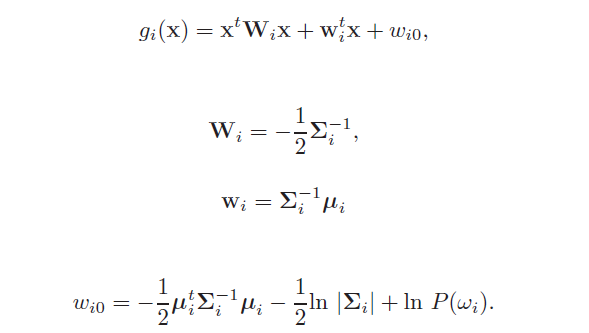

In [89]:
# Function that return the class based on the decision boundary
def g(x, W1, w1, w10, W2, w2, w20):
    g1 = np.dot(np.dot(x.T, W1), x) + np.dot(w1.T, x) + w10
    g2 = np.dot(np.dot(x.T, W2), x) + np.dot(w2.T, x) + w20
    return (g1 - g2)

In [90]:
cls1 = []
cls2 = []

for i in np.arange(0,8,0.1):
    for j in np.arange(-10,10,0.1):
        p = np.array([[i],[j]])
        res = g(p, W1, w1, w10, W2, w2, w20)
        if res > 0 :
            cls1.append(p)
        else:
            cls2.append(p)
            
cls1 = np.stack(cls1)
cls2 = np.stack(cls2)

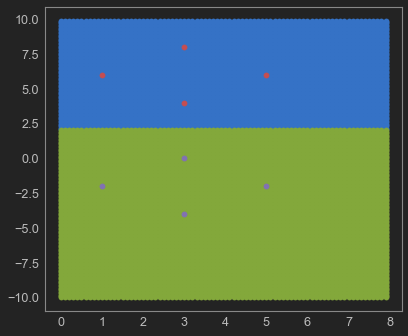

In [91]:
plt.scatter(cls1[:,0],cls1[:,1])
plt.scatter(cls2[:,0],cls2[:,1])
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])
plt.grid(b=None)
plt.show()

## Question 2

In [92]:
x1 = np.array(([1,-1], [2,-5], [3,-6], [4,-10], [5,-12], [6,-15]))
x2 = np.array(([-1,1], [-2,5], [-3,6], [-4,10], [-5,12], [-6, 15]))

Pw1 = 0.3
Pw2 = 0.7

In [93]:
W1, w1, w10, W2, w2, w20 = get_your_ws(x1, x2, Pw1, Pw2)

In [94]:
cls1 = []
cls2 = []

for i in np.arange(-8,8,0.1):
    for j in np.arange(-16,16,0.1):
        p = np.array([[i],[j]])
        res = g(p, W1, w1, w10, W2, w2, w20)
        if res > 0 :
            cls1.append(p)
        else:
            cls2.append(p)
            
cls1 = np.stack(cls1)
cls2 = np.stack(cls2)

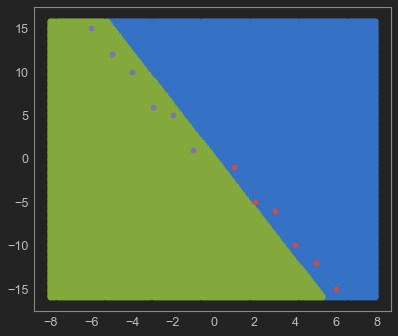

In [95]:
plt.scatter(cls1[:,0],cls1[:,1])
plt.scatter(cls2[:,0],cls2[:,1])
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])
plt.grid(b=None)
plt.show()

## Question 3

In [96]:
x1 = np.array(([2,6], [3,4], [3,8], [4,6]))
x2 = np.array(([3,0], [1,-2], [3,-4], [5,-2]))

Pw1 = 0.5
Pw2 = 0.5

In [97]:
W1, w1, w10, W2, w2, w20 = get_your_ws(x1, x2, Pw1, Pw2)

In [98]:
cls1 = []
cls2 = []

for i in np.arange(-8,8,0.1):
    for j in np.arange(-16,16,0.1):
        p = np.array([[i],[j]])
        res = g(p, W1, w1, w10, W2, w2, w20)
        if res > 0 :
            cls1.append(p)
        else:
            cls2.append(p)
            
cls1 = np.stack(cls1)
cls2 = np.stack(cls2)

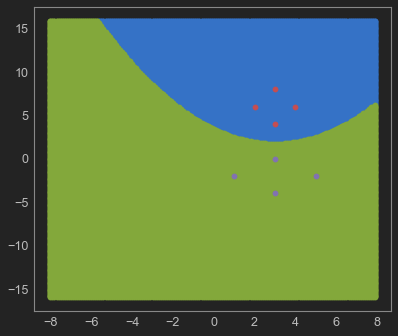

In [99]:
plt.scatter(cls1[:,0],cls1[:,1])
plt.scatter(cls2[:,0],cls2[:,1])
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])
plt.grid(b=None)
plt.show()

## Question 4

In [101]:
df = pd.read_csv('Iris_dataset.csv')
df.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


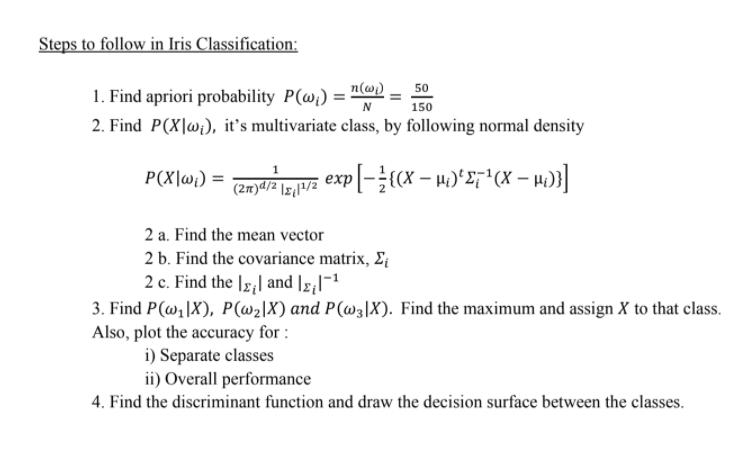

In [102]:
# Function to calculate the covariance and inverse covariance matrix of given data
def cov_mat_inv_calc(dfd):
    
    features = np.array(dfd[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])
    avg = np.average(features, axis = 0)
    flag = features - avg
    cov_mat = np.cov(features.T) 
    cov_inv = np.linalg.inv(cov_mat)
    
    return avg, cov_mat, cov_inv

In [103]:
class1 = df.loc[df.variety == 'Setosa'][:40]
class2 = df.loc[df.variety == 'Versicolor'][:40]
class3 = df.loc[df.variety == 'Virginica'][:40]

avg1, cov_mat1, cov_inv1 = cov_mat_inv_calc(class1)
avg2, cov_mat2, cov_inv2 = cov_mat_inv_calc(class2)
avg3, cov_mat3, cov_inv3 = cov_mat_inv_calc(class3)

In [104]:
# Function to find the liklihood of a data point
def prob_calc(mat, avg, cov_mat, cov_inv):
    return np.exp(-0.5 * np.dot(np.dot(mat - avg, cov_inv), (mat - avg).T)) / ((2 * np.pi)**(avg.shape[0]/2) * np.sqrt(np.linalg.det(cov_mat)))

In [105]:
test1 = np.array(df.loc[df.variety == 'Setosa'][40:][['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])
test2 = np.array(df.loc[df.variety == 'Versicolor'][40:][['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])
test3 = np.array(df.loc[df.variety == 'Virginica'][40:][['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])

In [106]:
for test in test1:
    p1 = prob_calc(test, avg1, cov_mat1, cov_inv1)
    p2 = prob_calc(test, avg2, cov_mat2, cov_inv2)
    p3 = prob_calc(test, avg3, cov_mat2, cov_inv2)
    if p1 < p2 or p1 < p3:
        print('Missclassified')

for test in test2:
    p1 = prob_calc(test, avg1, cov_mat1, cov_inv1)
    p2 = prob_calc(test, avg2, cov_mat2, cov_inv2)
    p3 = prob_calc(test, avg3, cov_mat2, cov_inv2)
    if p2 < p1 or p2 < p3:
        print('Missclassified')

for test in test3:
    p1 = prob_calc(test, avg1, cov_mat1, cov_inv1)
    p2 = prob_calc(test, avg2, cov_mat2, cov_inv2)
    p3 = prob_calc(test, avg3, cov_mat2, cov_inv2)
    if p3 < p1 or p3 < p2:
        print('Missclassified')

Note that no point is 'Misclassified'. It implies that all the validation points are classified correctly, hence achieving a 100% accuracy.

In [107]:
W1 = -0.5 * cov_inv1
w1 = np.dot(cov_inv1, avg1)
w10 = -0.5 * (np.dot(np.dot(avg1.T, cov_inv1), avg1) + np.log(np.linalg.det(cov_mat1))) + np.log(1/3)

W2 = -0.5 * cov_inv2
w2= np.dot(cov_inv2, avg2)
w20 = -0.5 * (np.dot(np.dot(avg2.T, cov_inv2), avg2) + np.log(np.linalg.det(cov_mat2))) + np.log(1/3)

W3 = -0.5 * cov_inv3
w3 = np.dot(cov_inv3, avg3)
w30 = -0.5 * (np.dot(np.dot(avg3.T, cov_inv3), avg3) + np.log(np.linalg.det(cov_mat3))) + np.log(1/3)

In [108]:
def g(x, W1, w1, w10, W2, w2, w20, W3, w3, w30):
    g1 = np.dot(np.dot(x.T, W1), x) + np.dot(w1.T, x) + w10
    g2 = np.dot(np.dot(x.T, W2), x) + np.dot(w2.T, x) + w20
    g3 = np.dot(np.dot(x.T, W3), x) + np.dot(w3.T, x) + w30
    g = np.array([g1, g2, g3])
    return np.argmax(g)

In [109]:
print('Feature 1 var :', np.var(np.concatenate([test1[:,0], test2[:,0], test3[:,0]])))
print('Feature 2 var :', np.var(np.concatenate([test1[:,1], test2[:,1], test3[:,1]])))
print('Feature 3 var :', np.var(np.concatenate([test1[:,2], test2[:,2], test3[:,2]])))
print('Feature 4 var :', np.var(np.concatenate([test1[:,3], test2[:,3], test3[:,3]])))

Feature 1 var : 0.523788888888889
Feature 2 var : 0.15876666666666664
Feature 3 var : 2.684233333333333
Feature 4 var : 0.6160999999999999



Notice that feature 1 and 2 have lesser variance than 3 and 4. Hence plotting a 2-D based on 3 and 4 features would be better.


In [110]:
cls1 = []
cls2 = []
cls3 = []

x_1 = (avg1[2] + avg2[2] + avg3[2])/3
x_2 = (avg1[3] + avg2[3] + avg3[3])/3

for x_3 in np.arange(-2, 7, 0.05):
    for x_4 in np.arange(-2, 7, 0.05):
#         for x_3 in np.arange(-100,100,10):
#             for x_4 in np.arange(-100,100,10):
        p = np.array([x_1, x_2, x_3, x_4])
        ind = g(p, W1, w1, w10, W2, w2, w20, W3, w3, w30)
        if ind == 0 :
            cls1.append(p)
        elif ind == 1:
            cls2.append(p)
        else:
            cls3.append(p)

cls1 = np.stack(cls1)
cls2 = np.stack(cls2)
cls3 = np.stack(cls3)

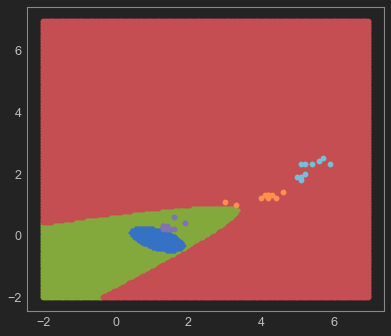

In [111]:
d1 = 2
d2 = 3

plt.scatter(cls1[:,d1],cls1[:,d2])
plt.scatter(cls2[:,d1],cls2[:,d2])
plt.scatter(cls3[:,d1],cls3[:,d2])

plt.scatter(test1[:,d1], test1[:,d2])
plt.scatter(test2[:,d1], test2[:,d2])
plt.scatter(test3[:,d1], test3[:,d2])

plt.grid(b=None)
plt.show()

The classifcation is visualized on a 2D plane, hence the discrepancy between the true class and predicted

## Question 5

In [112]:
def cov_mat_inv_calc(dfd):
    
    features = np.array(dfd[['petal.length', 'petal.width']])
    avg = np.average(features, axis = 0)
    flag = features - avg
    cov_mat = np.cov(features.T) #np.dot(flag.T, flag) / (len(dfd) - 1)
    cov_inv = np.linalg.inv(cov_mat)
    
    return avg, cov_mat, cov_inv

In [113]:
class1 = df.loc[df.variety == 'Setosa'][:40]
class2 = df.loc[df.variety == 'Versicolor'][:40]
class3 = df.loc[df.variety == 'Virginica'][:40]

avg1, cov_mat1, cov_inv1 = cov_mat_inv_calc(class1)
avg2, cov_mat2, cov_inv2 = cov_mat_inv_calc(class2)
avg3, cov_mat3, cov_inv3 = cov_mat_inv_calc(class3)

In [114]:
def prob_calc(mat, avg, cov_mat, cov_inv):
    return np.exp(-0.5 * np.dot(np.dot(mat - avg, cov_inv), (mat - avg).T)) / ((2 * np.pi)**(avg.shape[0]/2) * np.sqrt(np.linalg.det(cov_mat)))

In [115]:
test1 = np.array(df.loc[df.variety == 'Setosa'][40:][['petal.length', 'petal.width']])
test2 = np.array(df.loc[df.variety == 'Versicolor'][40:][['petal.length', 'petal.width']])
test3 = np.array(df.loc[df.variety == 'Virginica'][40:][['petal.length', 'petal.width']])

In [116]:
check1 = 0

for test in test1:
    p1 = prob_calc(test, avg1, cov_mat1, cov_inv1)
    p2 = prob_calc(test, avg2, cov_mat2, cov_inv2)
    p3 = prob_calc(test, avg3, cov_mat2, cov_inv2)
    if p1 < p2 or p1 < p3:
        check1 = 1
    
check2 = 0

for test in test2:
    p1 = prob_calc(test, avg1, cov_mat1, cov_inv1)
    p2 = prob_calc(test, avg2, cov_mat2, cov_inv2)
    p3 = prob_calc(test, avg3, cov_mat2, cov_inv2)
    if p2 < p1 or p2 < p3:
        check2 = 1
        
check3 = 0

for test in test3:
    p1 = prob_calc(test, avg1, cov_mat1, cov_inv1)
    p2 = prob_calc(test, avg2, cov_mat2, cov_inv2)
    p3 = prob_calc(test, avg3, cov_mat2, cov_inv2)
    if p3 < p1 or p3 < p2:
        check3 = 1
        
if check1 + check2 + check3 == 0:
    print('100% accuracy')    

100% accuracy


In [117]:
W1 = -0.5 * cov_inv1
w1 = np.dot(cov_inv1, avg1)
w10 = -0.5 * (np.dot(np.dot(avg1.T, cov_inv1), avg1) + np.log(np.linalg.det(cov_mat1))) + np.log(1/3)

W2 = -0.5 * cov_inv2
w2= np.dot(cov_inv2, avg2)
w20 = -0.5 * (np.dot(np.dot(avg2.T, cov_inv2), avg2) + np.log(np.linalg.det(cov_mat2))) + np.log(1/3)

W3 = -0.5 * cov_inv3
w3 = np.dot(cov_inv3, avg3)
w30 = -0.5 * (np.dot(np.dot(avg3.T, cov_inv3), avg3) + np.log(np.linalg.det(cov_mat3))) + np.log(1/3)

In [118]:
def g(x, W1, w1, w10, W2, w2, w20, W3, w3, w30):
    g1 = np.dot(np.dot(x.T, W1), x) + np.dot(w1.T, x) + w10
    g2 = np.dot(np.dot(x.T, W2), x) + np.dot(w2.T, x) + w20
    g3 = np.dot(np.dot(x.T, W3), x) + np.dot(w3.T, x) + w30
    g = np.array([g1, g2, g3])
    return np.argmax(g)

In [119]:
cls1 = []
cls2 = []
cls3 = []

for x_1 in np.arange(-2, 7, 0.05):
    for x_2 in np.arange(-2, 5, 0.05):
#         for x_3 in np.arange(-100,100,10):
#             for x_4 in np.arange(-100,100,10):
        p = np.array([x_1, x_2])
        ind = g(p, W1, w1, w10, W2, w2, w20, W3, w3, w30)
        if ind == 0 :
            cls1.append(p)
        elif ind == 1:
            cls2.append(p)
        else:
            cls3.append(p)

cls1 = np.stack(cls1)
cls2 = np.stack(cls2)
cls3 = np.stack(cls3)

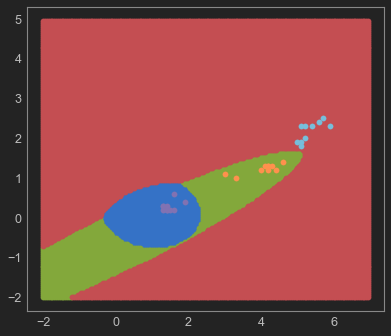

In [120]:
d1 = 0
d2 = 1

plt.scatter(cls1[:,d1],cls1[:,d2])
plt.scatter(cls2[:,d1],cls2[:,d2])
plt.scatter(cls3[:,d1],cls3[:,d2])

plt.scatter(test1[:,d1], test1[:,d2])
plt.scatter(test2[:,d1], test2[:,d2])
plt.scatter(test3[:,d1], test3[:,d2])

plt.grid(b=None)
plt.show()

*Perfecto*

## Question 6

In [121]:
df = pd.read_csv('face feature vectors.csv')
df.head(2)

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930


In [122]:
class1 = np.array(df.loc[df['Unnamed: 1'] == 'male'].drop([df.columns[0], df.columns[1]], axis = 1)) * 1000
class2 = np.array(df.loc[df['Unnamed: 1'] == 'female'].drop([df.columns[0], df.columns[1]], axis = 1)) * 1000

train1 = class1[5:]
test1 = class1[:5]

train2 = class2[5:]
test2 = class2[:5]

In [123]:
def cov_mat_inv_calc(features):
    
    avg = np.average(features, axis = 0)
    flag = features - avg
    cov_mat = np.cov(features.T) #np.dot(flag.T, flag) / (len(dfd) - 1)
    cov_inv = np.linalg.inv(cov_mat)
    
    return avg, cov_mat, cov_inv

In [124]:
avg1, cov_mat1, cov_inv1 = cov_mat_inv_calc(train1)
avg2, cov_mat2, cov_inv2 = cov_mat_inv_calc(train2)

In [125]:
def prob_calc(mat, avg, cov_mat, cov_inv):
    return np.exp(-0.5 * np.dot(np.dot(mat - avg, cov_inv), (mat - avg).T)) / ((2 * np.pi)**(avg.shape[0]/2) * np.sqrt(np.linalg.det(cov_mat)))

In [126]:
check1 = 0

for test in test1:
    p1 = prob_calc(test, avg1, cov_mat1, cov_inv1)
    p2 = prob_calc(test, avg2, cov_mat2, cov_inv2)
    if p2 > p1:
        check1 += 1
    
    
check2 = 0

for test in test2:
    p1 = prob_calc(test, avg1, cov_mat1, cov_inv1)
    p2 = prob_calc(test, avg2, cov_mat2, cov_inv2)
    if p1 > p2:
        check2 += 1

print('Misclassified male as female :', check1)
print('Misclassified female as male :', check2)

Misclassified male as female : 0
Misclassified female as male : 2


In [127]:
print('Validation accuracy :', 1 - ((check1 + check2)/(len(test1) + len(test2))))

Validation accuracy : 0.8
